# Declaration：
## This document uses modular programming, where individual functions are packaged as functions.
## The front part is the import packages
## The middle part is for each function
## The end part are function calls for the 3 problems
### Please see each section for detailed notations

In [40]:
# coding = utf-8
import matplotlib.pyplot as plt
import random
import numpy as np
import math
import copy

In [25]:
%matplotlib inline

## Global Variable Definitions
### The window size variable represents the canvas size and it can be modified
### DO NOT modify the remaining variables

In [42]:
# Modifiable Variable
WINDOW_SIZE = [10, 10]    # The Window Size

# Unmodifiable Variables
WINDOW_BACKGROUND = 0     # Background param
WINDOW_FOREGROUND = 255   # Foreground param
global rectangle_count    # Counter for number of rectangles
rectangle_count = 0

# region_window - Different rectangles are stored with different values
region_window = WINDOW_BACKGROUND * np.ones(WINDOW_SIZE).astype(np.int)
# region_window_bin - Store binary images
region_window_bin = WINDOW_BACKGROUND * np.ones(WINDOW_SIZE).astype(np.int)

In [46]:
# Trimming the Rectangle
# Find a rectangle with the largest area from the area not covered by other rectangles.
#
# Convert the problem to solve for the largest rectangle of a histogram starting from a specific row.
# Traverse the rows to find the rectangle with the largest area.

def trim_rectangle(rectangle):
    height, width = rectangle.shape[:2]
    area_max = 0
    x_from_max = 0
    x_to_max = 0
    y_from_max = 0
    y_to_max = 0
    
    # Using the histogram statistical solution:
    # For each time, start from the height_min line, count the histogram that start with this row.
    for height_min in range(0, height):
        histogram = []
        for i in range(0, width):
            histogram.append(0)
        # Histogram stats
        for x in range(0, width):
            for y in range(height_min, height):
                if rectangle[y, x] == WINDOW_BACKGROUND:
                    histogram[x] += 1
                else:
                    break
        # Calculate the largest rectangular area and position in the histogram
        y_from, y_to, x_from, x_to, area = max_rectangle_in_histogram(histogram)
        x_from += height_min
        x_to += height_min
        if area > area_max:
            area_max = area
            x_from_max = x_from
            x_to_max = x_to + 1
            y_from_max = y_from
            y_to_max = y_to + 1
    sup = copy.deepcopy(rectangle)

    return x_from_max, x_to_max, y_from_max, y_to_max, area_max

In [47]:
# Calculate the largest rectangle in a continuous histogram
def max_rectangle_in_histogram(histogram):
    histogram.append(-1)
    stack = [0]
    list_count = 0
    pop_count = 0
    area_max = 0
    x_from_max = 0
    x_to_max = 0
    y_from_max = 0
    y_to_max = 0
    while len(stack) > 0:
        if histogram[list_count] < stack[len(stack)-1]:
            x_from = list_count - pop_count
            y_to = stack[len(stack)-1]
            pop_count += 1
            if len(stack) == 2:
                area = list_count * stack.pop()
                x_from = 1
            else:
                area = pop_count * stack.pop()
            if area > area_max:
                area_max = area
                x_from_max = x_from - 1
                x_to_max = list_count - 1
                y_from_max = 0
                y_to_max = y_to - 1
        else:
            stack.append(histogram[list_count])
            pop_count = 0
            list_count += 1
    return x_from_max, x_to_max, y_from_max, y_to_max, area_max

In [48]:
# (Uniform distribution) Generates the random width and position coordinates of the rectangle
# window_size - Save window size and make sure all rectangle will not exceed window range
def create_rectangle_uniform(window_size):
    rectangle_width = math.floor(random.uniform(1, window_size[0]))
    rectangle_height = math.floor(random.uniform(1, window_size[1]))
    rectangle_pos_x = math.floor(random.uniform(0, window_size[0] + 1 - rectangle_width))
    rectangle_pos_y = math.floor(random.uniform(0, window_size[0] + 1 - rectangle_height))
    return [rectangle_pos_x, rectangle_pos_y, rectangle_width, rectangle_height]

In [49]:
# Calculate the area that already get covered
def calculate_area(window):
    width, height = window.shape[:2]
    area = 0
    for x in range(0, width):
        for y in range(0, height):
            if window[y, x] is not WINDOW_BACKGROUND:
                area += 1
    return area

In [50]:
# Visualization
def process_and_show(rectangle, is_show=True):
    global rectangle_count
    rectangle_count += 1
    region_window_sup = copy.deepcopy(region_window_bin)
    region_window_sup2 = copy.deepcopy(region_window_bin)
    rectangle_not_trimmed = region_window[rectangle[0]:rectangle[0] + rectangle[2],
                            rectangle[1]:rectangle[1] + rectangle[3]]
    x_from, x_to, y_from, y_to, area = trim_rectangle(rectangle_not_trimmed)
    if is_show:
        plt.subplot(141)
        plt.imshow(region_window_bin)
    region_window_sup2[rectangle[0]:rectangle[0] + rectangle[2],
                       rectangle[1]:rectangle[1] + rectangle[3]] \
        = WINDOW_FOREGROUND + 100
    region_window_sup[rectangle[0] + x_from:rectangle[0] + x_to,
                      rectangle[1] + y_from:rectangle[1] + y_to] \
        = WINDOW_FOREGROUND + 100
    region_window_bin[rectangle[0] + x_from:rectangle[0] + x_to,
                      rectangle[1] + y_from:rectangle[1] + y_to] \
        = WINDOW_FOREGROUND
    region_window[rectangle[0] + x_from:rectangle[0] + x_to,
                  rectangle[1] + y_from:rectangle[1] + y_to] \
        = rectangle_count
    # Image Display
    if is_show:
        plt.subplot(142)
        plt.imshow(region_window_sup2)
        plt.subplot(143)
        plt.imshow(region_window_sup)
        plt.subplot(144)
        plt.imshow(region_window)
        plt.show()
    return None

In [51]:
# Reset the canvas and clear the rectangle in the canvas
def window_reset(WINDOW_SIZE):
    global region_window
    global region_window_bin
    # region_window - Different rectangles are stored with different values
    region_window = WINDOW_BACKGROUND * np.ones(WINDOW_SIZE).astype(np.int)
    # region_window_bin - Store binary images
    region_window_bin = WINDOW_BACKGROUND * np.ones(WINDOW_SIZE).astype(np.int)

In [57]:
# Function for Problem 1:
# Given a preset rectangle, calculate the final footprint
def question_1(retangles, is_show=False):
    window_reset(WINDOW_SIZE)
    n = len(retangles)
    for num in range(0, n):
        process_and_show(retangles[num], is_show=is_show)
    area = calculate_area(region_window)
    return area

In [58]:
# Function for Problem 2:
# Given a preset rectangle, calculate the sum of the final footprint and the area of all rectangles
def question_2(retangles, is_show=False):
    window_reset(WINDOW_SIZE)
    total_area = question_1(retangles, is_show=is_show)
    original_area = 0
    n = len(retangles)
    for num in range(0, n):
        original_area += retangles[num][2] * retangles[num][3]
    return total_area, original_area

In [59]:
# Function for Problem 3:
# Given the number of repetitions num_repeat, calculate how many rectangles are needed each time to fully cover the canvas
def question_3(num_repeat=1000, is_show=False):
    count = 0
    for i in range(0, num_repeat):
        window_reset(WINDOW_SIZE)
        while np.min(region_window) == WINDOW_BACKGROUND:
            count += 1
            rectangle = create_rectangle_uniform(WINDOW_SIZE)
            process_and_show(rectangle, is_show=is_show)
    return count/num_repeat

## Problem 1
### Given an overall desired coverage footprint and a sequence of n communications towers, what is the resulting resolved coverage?

In [63]:
# Solving Problem 1
# Pre-build rectangles for input
retangles = []
rect_num = 10
for i in range(0, rect_num):
    retangle = create_rectangle_uniform(WINDOW_SIZE)
    retangles.append(retangle)

area = question_1(retangles, is_show=False)
print("area =", area)    # Area Covered

area = 100


## Problem 2
### What is the total area of coverage relative to the desired total coverage area of the original footprint? That is, are there any gaps in coverage?

In [68]:
# Solving Problem 2
# Pre-build rectangles for input
retangles = []
rect_num = 10
for i in range(0, rect_num):
    retangle = create_rectangle_uniform(WINDOW_SIZE)
    retangles.append(retangle)

total_area, original_area = question_2(retangles, is_show=False)
print("total_area =", total_area)    # Area Covered
print("original_area =",original_area)    # Area of the original footprint
print("Percentage =", (total_area/original_area)*100)

total_area = 100
original_area = 165
Percentage = 60.60606060606061


## Problem 3
### On average, how many communications towers are required before full coverage is obtained?

In [69]:
# Solving Problem 3
average_towers = question_3(num_repeat=1000, is_show=False)
print("average towers=", average_towers)    # On average, how many rectangles are needed each time to fully cover the canvas

average towers= 52.03


## Visualization Examples
### Randomly generate rectangles, compare to the existing rectangles in the canvas, and cut out the largest sub-rectangle.
### The four output images indicate:
### 1. The canvas before the rectangle is added (the location of the existing rectangle is represented by the same color)
### 2. Canvas after adding uncut rectangle (existing rectangle and newly added rectangle are represented by different colors)
### 3. Canvas after adding trimmed rectangle (previous rectangles and cropped rectangles are represented by different colors)
### 4. Canvas after adding trimmed rectangle (different rectangles are represented by different colors)

0


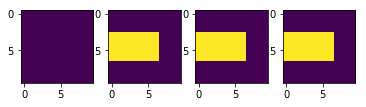

1


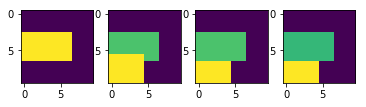

2


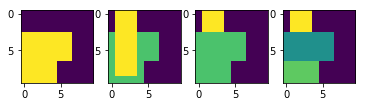

3


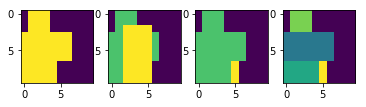

4


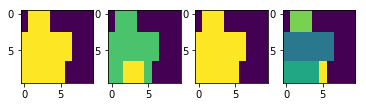

5


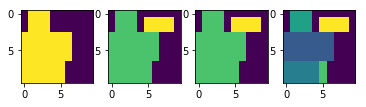

6


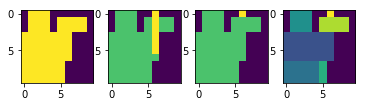

7


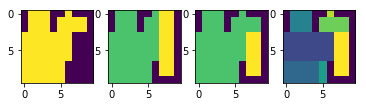

8


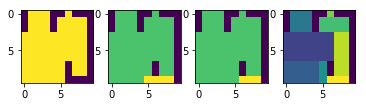

9


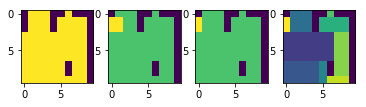

In [73]:
# Visualization Example
# Pre-build rectangles for input
window_reset(WINDOW_SIZE)
rectangle_count = 1
rect_num = 10
for i in range(0, rect_num):
    retangle = create_rectangle_uniform(WINDOW_SIZE)
    print(i)
    process_and_show(retangle, is_show=True)